<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 3 / NOTE 4 / Supplementary*

---

# Multi-class Classification

- 지금까지 해결한 분류 문제들은 타겟이 0 / 1의 2개 class로 구성된 문제들이었습니다.
- 하지만 기존에 배운 분류 모델들을 사용해 다중 class를 타겟으로 갖는 분류 문제도 해결할 수 있습니다.
- 간단한 예시를 통해 Logistic Regression / Tree-based 모델을 사용해 다중 분류 문제를 해결해 보겠습니다.


In [ ]:
# scikit-learn에서는 분류용 가상 데이터를 생성하는 make_classification 함수를 제공합니다.
# 가상 데이터를 통해, 사용하고자 하는 모델의 옵션들 및 입출력 포멧에 대해 간단히 테스트해 볼 수 있습니다.
# 가상 데이터를 사용해 4-class 분류 문제를 해결해 보겠습니다.
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=1250,
    n_features=20,
    n_informative=12,
    n_classes=4,
    n_clusters_per_class=3,
    random_state=42,
)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, stratify=y, train_size=0.8, random_state=42
)

In [ ]:
print("Train:", X_train.shape, y_train.shape)
print("Val:", X_val.shape, y_val.shape)

Train: (1000, 20) (1000,)
Val: (250, 20) (250,)


In [ ]:
import numpy as np

print(np.unique(y))  # 0, 1, 2, 3의 4-class를 타겟으로 갖는 분류 문제를 해결해 봅시다.

[0 1 2 3]


## 1. Logistic Regression

- `Logistic Regression`에서는 다중 분류 문제를 해결하기 위한 옵션 파라미터(`multi_class`)에서 두 가지 선택지(`ovr`, `multinomial`)가 존재합니다.
  -  `ovr`: 클래스 수만큼의 `Logistic Regression` 모델을 사용하여, 각 클래스에 대해 해당되는지 해당되지 않는지 여부를 이진 분류 문제로 해결합니다. 
  - `multinomial`: 클래스 수만큼의 `Logistic Regression` 모델을 사용하지만, loss function으로 multinomial cross entropy loss function을 사용합니다. 이를 위해  `sigmoid` 함수 대신 `softmax`라는 함수가 사용됩니다.

    - `binary cross entropy loss`:
      $$ L(y, \hat{y}) = -\left(y \log{\sigma(\hat{y})} + \left(1-y\right) \log{\left(1-\sigma(\hat{y})\right)} \right)$$

    - `multinomial cross entropy loss function`:
      $$ L(y, \hat{y}) = - \sum_{i=1}^{nClass} { \mathbb{1}(y = i) \log{p_{i}}} \newline where \newline p_{i} = \frac{exp(y_i)}{\sum_{j=1}^{nClass} exp(y_j)}$$
  
      ex) 
        4개의 class를 갖는 분류 문제에서 4개의 분류기가 각각 $y=[1.2, 0.8, -1.8, -0.3]$을 예측했다면,
        
        $$ p_1 = \frac{exp(1.2)}{exp(1.2) + exp(0.8) + exp(-1.8) + exp(-0.3)} = 0.5146$$
        $$ p_2 = \frac{exp(0.8)}{exp(1.2) + exp(0.8) + exp(-1.8) + exp(-0.3)} = 0.3450$$
        $$ p_3 = \frac{exp(-1.8)}{exp(1.2) + exp(0.8) + exp(-1.8) + exp(-0.3)} = 0.0256$$
        $$ p_4 = \frac{exp(-0.3)}{exp(1.2) + exp(0.8) + exp(-1.8) + exp(-0.3)} = 0.1148$$
        이 샘플의 정답이 $y=2$이라면,
        $$ Loss = -\log{p_2} = -\log{0.3450} $$

#### cf) Softmax
- `softmax` 함수는 아래와 같이 정의되며, 각 class에 속할 확률을, 각 class에 대해 0~1사이 값이 되고 전체 합이 1이 되도록 만들어 주는 함수입니다. 
- 섹션4에서 더 자세히 배우게 될 것입니다.

$$ softmax(x)_{i}=\frac{e^{x_{i}}}{\sum_{j=1}^{K} e^{x_{j}}} $$ 

In [ ]:
import numpy as np


def softmax(x):
    return np.exp(x) / np.exp(x).sum()


print(softmax(np.array([1.2, 0.8, -1.8, -0.3])))

[0.5146052  0.34495018 0.02562068 0.11482394]


In [ ]:
from sklearn.linear_model import LogisticRegression

lr_ovr = LogisticRegression(multi_class="ovr", random_state=42).fit(X_train, y_train)
lr_multinomial = LogisticRegression(multi_class="multinomial", random_state=42).fit(
    X_train, y_train
)

In [ ]:
# 두 모델 모두 class의 갯수만큼의 Logistic Regression 모델을 사용함을 확인해 보세요.
print(lr_ovr.coef_.shape, lr_multinomial.coef_.shape)

(4, 20) (4, 20)


In [ ]:
lr_ovr.predict(X_val)

array([0, 2, 0, 2, 0, 1, 0, 2, 1, 1, 0, 2, 1, 1, 2, 3, 1, 1, 2, 2, 3, 3,
       0, 0, 2, 2, 1, 1, 1, 2, 1, 0, 2, 3, 1, 3, 0, 2, 1, 3, 0, 1, 3, 0,
       0, 2, 3, 3, 1, 2, 2, 0, 3, 1, 3, 0, 0, 1, 3, 1, 2, 3, 1, 0, 2, 3,
       3, 0, 2, 0, 1, 1, 0, 1, 2, 0, 2, 2, 0, 1, 3, 2, 1, 1, 0, 3, 0, 1,
       1, 0, 0, 3, 3, 3, 2, 1, 3, 2, 2, 3, 2, 0, 0, 1, 2, 0, 0, 3, 0, 2,
       3, 0, 1, 1, 2, 1, 2, 2, 0, 3, 2, 1, 2, 0, 3, 2, 1, 2, 2, 0, 0, 2,
       1, 3, 3, 0, 0, 0, 0, 0, 3, 1, 0, 2, 2, 2, 2, 2, 2, 0, 3, 3, 3, 1,
       0, 3, 1, 1, 1, 2, 2, 2, 0, 0, 2, 3, 3, 2, 0, 2, 3, 2, 1, 3, 0, 1,
       1, 0, 1, 0, 0, 3, 2, 2, 2, 3, 2, 0, 2, 3, 1, 2, 1, 2, 1, 0, 0, 3,
       2, 1, 2, 0, 0, 3, 2, 0, 1, 0, 1, 0, 3, 3, 3, 3, 0, 2, 1, 0, 0, 1,
       3, 0, 3, 2, 0, 2, 1, 3, 2, 0, 0, 0, 1, 3, 3, 1, 1, 3, 2, 1, 2, 2,
       0, 3, 3, 0, 0, 1, 3, 0])

In [ ]:
lr_multinomial.predict(X_val)

array([0, 2, 0, 2, 0, 1, 0, 2, 1, 1, 0, 2, 1, 1, 2, 3, 1, 1, 2, 2, 3, 3,
       0, 0, 2, 2, 1, 1, 1, 2, 1, 0, 2, 3, 1, 3, 0, 2, 1, 3, 0, 1, 3, 0,
       0, 2, 3, 3, 1, 2, 2, 0, 3, 1, 3, 0, 0, 1, 3, 1, 2, 3, 1, 0, 2, 3,
       3, 0, 2, 0, 1, 1, 0, 1, 2, 0, 2, 2, 0, 1, 0, 2, 1, 1, 0, 3, 0, 1,
       1, 0, 0, 3, 3, 3, 2, 1, 3, 2, 2, 3, 2, 0, 0, 1, 2, 0, 0, 3, 0, 2,
       3, 0, 1, 1, 2, 1, 2, 2, 0, 3, 2, 1, 2, 0, 3, 2, 1, 2, 2, 0, 0, 2,
       1, 3, 3, 0, 0, 0, 0, 0, 3, 1, 0, 2, 2, 1, 2, 2, 2, 0, 3, 3, 3, 1,
       0, 2, 1, 1, 1, 2, 2, 2, 0, 0, 2, 3, 3, 2, 0, 2, 3, 2, 1, 3, 3, 1,
       1, 3, 1, 0, 0, 3, 2, 2, 2, 3, 2, 0, 2, 3, 1, 2, 1, 2, 1, 0, 0, 3,
       2, 1, 2, 0, 0, 3, 2, 0, 1, 0, 1, 0, 3, 3, 3, 3, 0, 2, 1, 0, 0, 1,
       3, 0, 3, 2, 0, 2, 1, 3, 2, 0, 0, 0, 1, 3, 3, 1, 1, 3, 2, 1, 2, 2,
       0, 3, 3, 0, 0, 1, 3, 0])

## 2. Tree-based Model
- 트리 기반 모델의 경우 기본적으로 다중 분류를 지원합니다. 트리 학습에 사용되는 비용 함수인 지니 불순도와 엔트로피가 다중 class 상황에서도 예외 없이 정의되기 때문입니다.

#### 지니 불순도

$$ I_{G}(p)=\sum_{i=1}^{nClass} p_i (1-p_i) = 1 - \sum_{i=1}^{nClass} p_i^2$$

ex) $[0, 0, 1, 2, 2, 2, 3, 3]$ 로 구성된 데이터에 대해 지니 불순도는 아래와 같이 계산됩니다.

$$ I_{G}(p)=1-(\frac{2}{8})^2-(\frac{1}{8})^2-(\frac{3}{8})^2-(\frac{2}{8})^2$$

#### 엔트로피

$$ H(p)=-\sum_{i=1}^{nClass} p_i \log_2{p_i} $$

ex) $[0, 0, 1, 2, 2, 2, 3, 3]$ 로 구성된 데이터에 대해 엔트로피는 아래와 같이 계산됩니다.

$$ H(p) = 
    -\frac{2\log_2{2/8}}{8} 
    -\frac{\log_2{1/8}}{8} 
    -\frac{3\log_2{3/8}}{8} 
    -\frac{2\log_2{2/8}}{8} 
    $$

- 트리 기반 모델에서는 별도 하이퍼파라미터 조정 없이 다중 클래스 분류를 바로 수행할 수 있습니다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier(max_depth=7).fit(X_train, y_train)
rf = RandomForestClassifier(max_depth=7, n_estimators=100, random_state=42).fit(
    X_train, y_train
)

In [ ]:
dt.predict(X_val)

array([3, 1, 0, 0, 0, 0, 0, 1, 3, 1, 0, 2, 1, 3, 3, 3, 1, 2, 3, 3, 1, 1,
       0, 0, 2, 2, 1, 0, 3, 1, 2, 0, 3, 3, 0, 3, 2, 0, 1, 3, 0, 2, 0, 3,
       0, 1, 1, 2, 3, 2, 2, 0, 3, 1, 2, 0, 3, 1, 2, 3, 0, 3, 1, 0, 1, 0,
       1, 1, 2, 1, 0, 3, 0, 3, 0, 0, 2, 1, 0, 1, 1, 2, 1, 2, 2, 2, 0, 3,
       1, 0, 3, 3, 3, 3, 2, 1, 2, 2, 2, 3, 2, 0, 3, 1, 2, 0, 3, 2, 0, 2,
       3, 0, 1, 2, 2, 1, 2, 3, 0, 2, 3, 1, 3, 0, 3, 1, 0, 3, 0, 0, 2, 2,
       1, 2, 2, 0, 3, 0, 1, 2, 3, 1, 2, 3, 2, 2, 0, 2, 0, 0, 2, 1, 2, 0,
       2, 3, 1, 1, 1, 2, 1, 2, 0, 2, 2, 0, 3, 1, 3, 2, 3, 2, 1, 0, 3, 1,
       1, 1, 1, 3, 0, 0, 3, 2, 2, 3, 2, 0, 2, 3, 1, 2, 3, 0, 1, 0, 0, 1,
       2, 3, 2, 0, 1, 3, 1, 0, 1, 0, 3, 0, 3, 3, 3, 0, 0, 0, 1, 0, 0, 0,
       2, 3, 2, 3, 0, 2, 1, 3, 2, 0, 0, 0, 1, 3, 3, 0, 1, 2, 0, 0, 3, 0,
       1, 3, 3, 3, 0, 1, 2, 0])

In [ ]:
rf.predict(X_val)

array([3, 1, 0, 2, 0, 1, 0, 0, 1, 1, 0, 2, 1, 1, 3, 3, 1, 2, 2, 1, 1, 1,
       0, 0, 2, 2, 1, 1, 3, 3, 1, 0, 2, 2, 1, 3, 0, 2, 1, 3, 0, 1, 3, 0,
       0, 0, 1, 3, 3, 2, 2, 0, 2, 1, 2, 3, 2, 1, 3, 1, 0, 3, 1, 0, 2, 3,
       1, 2, 2, 0, 1, 3, 0, 3, 3, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 1,
       1, 0, 3, 3, 3, 2, 2, 1, 2, 2, 1, 3, 2, 0, 3, 1, 2, 0, 2, 2, 0, 2,
       3, 0, 1, 2, 0, 1, 2, 2, 0, 3, 2, 1, 2, 0, 3, 3, 1, 2, 2, 0, 0, 2,
       1, 2, 2, 0, 0, 0, 0, 2, 3, 1, 0, 3, 2, 2, 0, 2, 2, 0, 3, 3, 3, 1,
       0, 3, 1, 1, 1, 2, 2, 2, 0, 0, 2, 0, 3, 1, 3, 2, 2, 2, 1, 3, 3, 1,
       1, 3, 1, 0, 3, 3, 2, 2, 2, 3, 2, 0, 2, 3, 1, 2, 3, 2, 1, 0, 0, 0,
       2, 1, 2, 0, 0, 3, 1, 0, 1, 0, 1, 0, 3, 3, 3, 0, 0, 2, 1, 0, 0, 0,
       3, 0, 3, 3, 0, 2, 0, 3, 2, 0, 0, 0, 1, 3, 3, 1, 1, 3, 2, 1, 2, 2,
       0, 3, 0, 0, 0, 1, 2, 0])

### 어떤 트리가 만들어졌는지 확인해 봅시다.

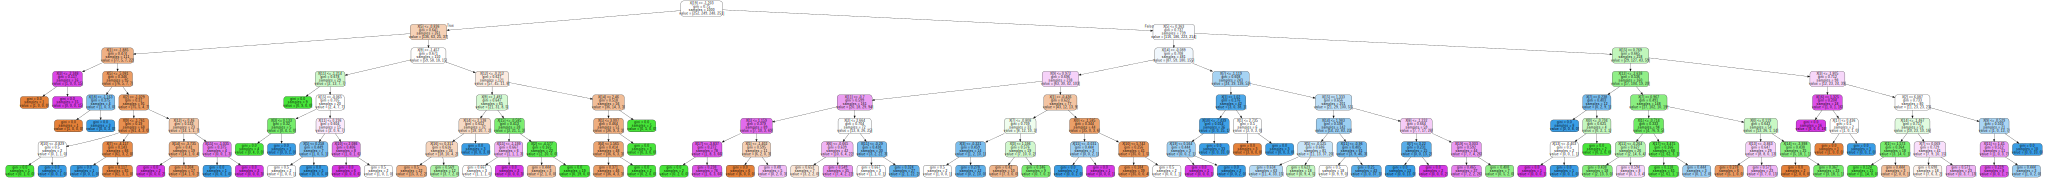

In [ ]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(dt, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

## 3. Metrics for Multi-class Classification
- 다중 분류 문제에서 사용하는 분류 평가지표 중 대표적인 몇 가지를 소개합니다.

### 1. Accuracy (Multi-class Accuracy)
- 이진 분류 문제에서의 정확도 개념을 다중 클래스로 그대로 확장한 것으로, 전체 샘플의 수 대비 예측과 정답이 동일한 샘플의 수로 계산됩니다.

In [ ]:
from sklearn.metrics import accuracy_score

# accuracy = (y_val == y_pred).sum() / len(y_pred)
print("Accuracy:", accuracy_score(y_val, rf.predict(X_val)))

Accuracy: 0.692


### 2. Confusion Matrix
- `confusion matrix` 또한 각 class에 대해 계산될 수 있습니다.

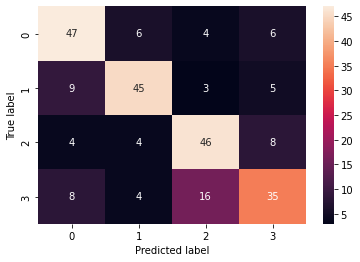

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_val, rf.predict(X_val)), annot=True, fmt="g")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

### 3. F1-score
- 이진 클래스에서 F1-score는 아래와 같이 계산됩니다.

$$ F1 = \frac{TP}{TP + (FP + FN) / 2} $$

- 다중 클래스에서는 각 클래스별로 TP, TN, FP, FN이 정의됩니다.
  - 예를 들어, 0-class의 TP, TN, FP, FN은 아래와 같이 정의됩니다.

    <img src="https://i.imgur.com/5GhBzyA.png" width="500"/>

- 다중 클래스에서의 F1-score는 `micro`, `macro`, `weighted`의 세 가지 방법으로 계산될 수 있습니다.


  - `micro`: 최종 TP, TN, FP, FN을 각 class의 TP, TN, FP, FN 각각의 합으로 정의합니다. 이후 F1을 계산합니다(이는 `Accuracy`와 같은 값을 갖게 됩니다).
  - `macro`: 각 class의 TP, TN, FP, FN을 사용해 class별로 F1을 구한 후, 이를 단순평균합니다.
  - `weighted`: 각 class의 TP, TN, FP, FN을 사용해 class별로 F1을 구한 후, 이를 각 class에 속하는 데이터의 수로 가중평균합니다.

In [ ]:
from sklearn.metrics import f1_score

print("F1-micro:", f1_score(y_val, rf.predict(X_val), average="micro"))
print("F1-macro", f1_score(y_val, rf.predict(X_val), average="macro"))
print("F1-weighted", f1_score(y_val, rf.predict(X_val), average="weighted"))

F1-micro: 0.692
F1-macro 0.6904848948568588
F1-weighted 0.6902244070988


### 4. Classification Report
- 이진 분류에서와 동일한 방식으로 `classification report`도 확인할 수 있습니다.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_val, rf.predict(X_val)))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72        63
           1       0.76      0.73      0.74        62
           2       0.67      0.74      0.70        62
           3       0.65      0.56      0.60        63

    accuracy                           0.69       250
   macro avg       0.69      0.69      0.69       250
weighted avg       0.69      0.69      0.69       250

